In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [7]:
theta=3
alpha=0.1
dat=[]
for oo in range(0,10):
    res=alpha*2*theta
    print("{0:.4f} {1:4f}".format(theta,res))
    dat.append([theta,theta**2])
    theta=theta-res

3.0000 0.600000
2.4000 0.480000
1.9200 0.384000
1.5360 0.307200
1.2288 0.245760
0.9830 0.196608
0.7864 0.157286
0.6291 0.125829
0.5033 0.100663
0.4027 0.080531


# store into dataframe

In [9]:
tmp=pd.DataFrame(dat)

In [10]:
tmp

,0,1
0,3.000000,9.000000
1,2.400000,5.760000
2,1.920000,3.686400
3,1.536000,2.359296
4,1.228800,1.509949
5,0.983040,0.966368
6,0.786432,0.618475
7,0.629146,0.395824
8,0.503316,0.253327
9,0.402653,0.162130


##        Visualize

Text(0,0.5,'J(theta)')

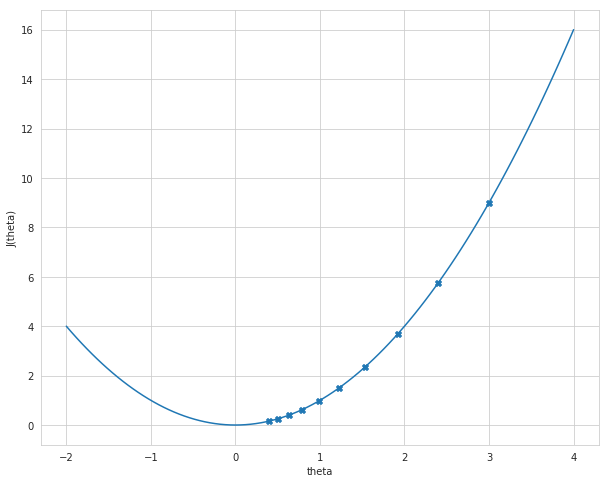

In [11]:
plt.figure(figsize=(10,8))
plt.plot(np.linspace(-2,4,100),np.linspace(-2,4,100)**2)
plt.scatter(tmp.iloc[:,0],tmp.iloc[:,1],marker="X")
plt.xlabel("theta")
plt.ylabel("J(theta)")

In [14]:
theta=3
alpha=0.01
dat=[]
for oo in range(0,10):
    res=alpha*(4*theta**3+2*theta)
    print("{0:,.4f} {1:.4f}".format(theta,res))
    dat.append([theta,theta**4+theta**2])
    theta=theta-res

3.0000 1.1400
1.8600 0.2946
1.5654 0.1847
1.3807 0.1329
1.2478 0.1027
1.1451 0.0830
1.0621 0.0692
0.9930 0.0590
0.9339 0.0513
0.8827 0.0452


In [15]:
tmp=pd.DataFrame(dat)

In [16]:
tmp

,0,1
0,3.000000,90.000000
1,1.860000,15.428432
2,1.565406,8.455422
3,1.380657,5.539863
4,1.247771,3.980968
5,1.145108,3.030703
6,1.062144,2.400869
7,0.992970,1.958167
8,0.933949,1.633098
9,0.882684,1.386175


Text(0,0.5,'J(theta)')

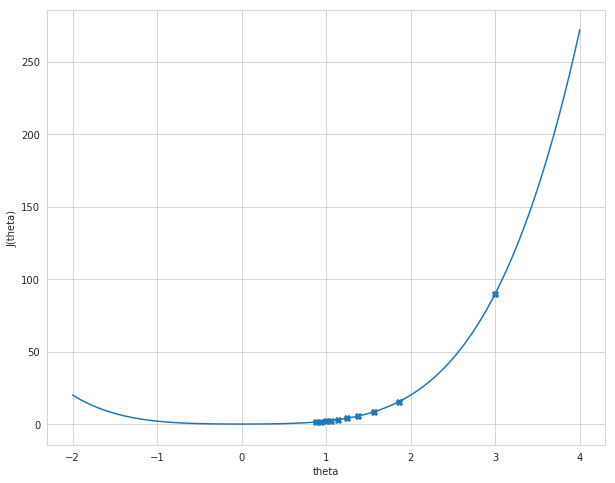

In [17]:
plt.figure(figsize=(10,8))
x_grid=np.linspace(-2,4,100)
plt.plot(x_grid,x_grid**4+x_grid**2)
plt.scatter(tmp.iloc[:,0],tmp.iloc[:,1],marker="X")
plt.xlabel("theta")
plt.ylabel("J(theta)")

# Application of Gradient Descent Algorithm to Boston Housing Data

In [18]:
from sklearn.datasets import load_boston

In [20]:
boston_data=load_boston()

In [22]:
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [23]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
X=df[["LSTAT"]].values

In [25]:
y=boston_data.target

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc_x=StandardScaler()

In [28]:
sc_y=StandardScaler()

In [32]:
X_std=sc_x.fit_transform(X)

In [34]:
y_std=sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [48]:
alpha=0.0001
w_=np.zeros(1+X_std.shape[1])
cost_=[]
n_=100
for i in range(n_):
    y_pred=np.dot(X_std,w_[1:])+w_[0]
    errors=(y_std-y_pred)
    w_[1:] +=alpha*X_std.T.dot(errors)
    w_[0] +=alpha*errors.sum()
    cost=(errors**2).sum()/2.0
    cost_.append(cost)

Text(0.5,0,'EPOCH')

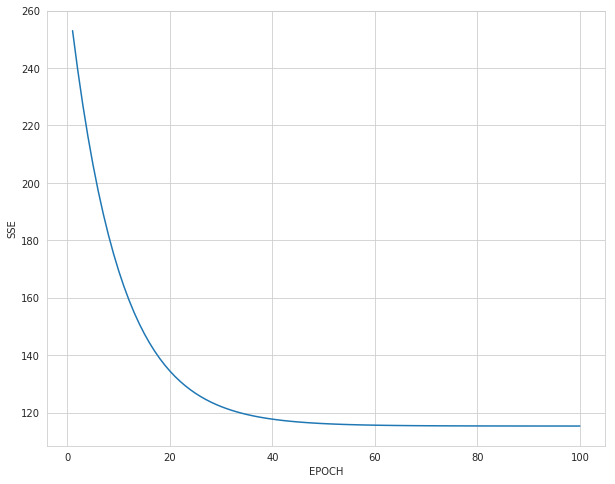

In [49]:
plt.figure(figsize=(10,8))
plt.plot(range(1,n_+1),cost_)
plt.ylabel("SSE")
plt.xlabel("EPOCH")